In [41]:
import pandas as pd
import matplotlib.pylab as plt
import folium
from folium import plugins

# Read the dataset

In [42]:
df = pd.read_parquet('data/geolife_trajectories_1_3.parquet')
df_small = df.head(100000) # Make a smaller dataset for simple scatter plots
print(df.shape[0])
df.head()

24876978


,lat,lon,datetime,altitude_meters,tripId,userId
0,22.809117,108.332245,2009-02-03 13:47:05,125.228912,023_20090203134705,023
1,22.809117,108.332245,2009-02-03 13:47:08,125.228912,023_20090203134705,023
2,22.809114,108.332242,2009-02-03 13:47:10,73.726891,023_20090203134705,023
3,22.809067,108.332269,2009-02-03 13:47:15,72.204330,023_20090203134705,023
4,22.809172,108.332235,2009-02-03 13:47:20,57.463833,023_20090203134705,023


In [43]:
df.dtypes

lat                       float64
lon                       float64
datetime           datetime64[ns]
altitude_meters           float64
tripId                     object
userId                     object
dtype: object

## matplotlib

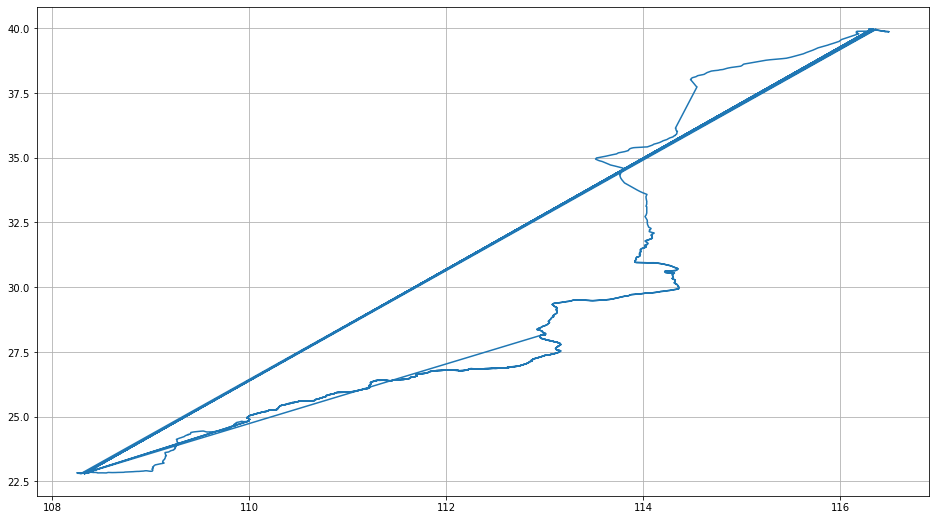

In [44]:
plt.figure(figsize = (16, 9))
plt.plot(df_small.lon, df_small.lat)
plt.grid()

## cartopy (basemap is depreceated)

In [45]:
#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()

#df_plot = df.sample(1000)
#print(df_plot)

#plt.plot(df_plot['lon'].tolist(), df_plot['lat'].tolist(),
#         color='blue', linewidth=2, marker='o',
#         transform=ccrs.Geodetic(),
#         )


## folium

In [63]:
m = folium.Map() # m = folium.Map([22.813473, 108.333078], zoom_start=15) or use m.fit_bounds(m.get_bounds())

# Select 10 trips
trips = df.tripId.unique().tolist()[2:3]

for trip in trips:
    df_plot = df[df.tripId == trip]
    
    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))
    line = folium.PolyLine(line_data, weight=15).add_to(m)

m.fit_bounds(m.get_bounds())
#m.save('data/folium_simple_line.html')
m 

In [64]:
m = folium.Map()

for trip in trips:
    df_plot = df[df.tripId == trip]
    
    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))
    
    # Plot the line
    folium.plugins.AntPath(locations=line_data, reverse='True', dash_array=[20, 30]).add_to(m)

m.fit_bounds(m.get_bounds())
m